In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import cv2


In [25]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

IndentationError: expected an indented block (2456110556.py, line 3)

In [18]:
data=pd.read_csv("A2Z.csv")
print(data.shape)
label = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}
#data.iloc[:,0] = data.iloc[:,0].map(label)
x = np.float32(np.array(data.drop(data.columns[0],axis=1)))# Droping the label column
y = np.array(data.iloc[:,0].copy()) # Copying the label column


(372450, 785)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


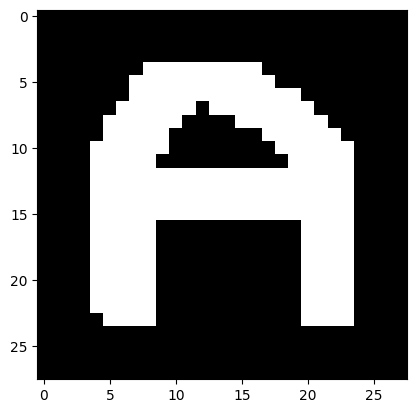

In [19]:
sample_data=cv2.cvtColor(x[3000].reshape(28,28),cv2.COLOR_RGB2BGR)
plt.imshow(sample_data)


In [20]:
(t_im,t_lab),(tes_im,tes_lab)=(x[0:297960,:],y[0:297960]),(x[297960:372450,:],y[297960:372450])

In [21]:
print(t_im.shape)
t_im,tes_im=t_im.reshape(t_im.shape[0],28,28,1),tes_im.reshape(tes_im.shape[0],28,28,1)
t_lab=to_categorical(t_lab)
tes_lab=to_categorical(tes_lab)
print(t_im.shape)

(297960, 784)
(297960, 28, 28, 1)


In [22]:
t_im,tes_im=t_im/255.0,tes_im/255.0
model=keras.models.Sequential()
model.add(layers.Conv2D(128,(5,5),activation="relu",input_shape=(28,28,1)))
model.add(layers.Conv2D(128,(5,5),activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.Conv2D(32,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2,2)),)
model.add(tf.keras.layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(500,activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(layers.Dense(20,activation="softmax"))

model.compile(keras.optimizers.Adam(learning_rate=0.001),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
print((tf.config.list_physical_devices('GPU')))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [23]:
model.fit(t_im,t_lab,epochs=5,validation_data=(tes_im,tes_lab),batch_size=1)
score=model.evaluate(tes_im,tes_lab)
print("accuracy=",score[1])
print("loss=",score[0])


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [7]:
model.save("num_ker_datasets.h5")